# Los Angeles Airbnb Listings

Isaac Edem Adoboe

Memorial University of Newfoundland

December 11, 2024


# Introduction

As Airbnb continues to impact urban rental markets, this dataset allows analysts, researchers, and real estate professionals to investigate how the short-term rental market shapes the local economy and influences housing availability.

**Objective:** Leverage this dataset to perform location-based analysis, host behavior analysis, market analysis, and explore the popularity of amenities and property types to try to determine which of these combinations makes a listing a good one and what makes a bad one.


## About Dataset

This dataset provides extensive information about Airbnb properties listed in **Los Angeles, California.** It offers a wealth of details suitable for analyzing short-term rental trends, exploring traveler behavior, and studying pricing dynamics within one of the most vibrant tourism markets in the U.S.

**Attributes**

- Unique identifier assigned to each property listing.
- Property listing name as provided by the host.
- Unique identifier assigned to the host of the property.
- Name of the host associated with the property.
- Date on which the host joined Airbnb.
- Typical response time of the host to guest inquiries.
- Percentage of guest inquiries that the host responded to.
- Indicates whether the host is a Superhost (True/False).
- Neighborhood name where the property is located.
- Standardized neighborhood group or district where the property is located.
- Geographic latitude coordinate.
- Geographic longitude coordinate.
- Type of property.
- Type of room offered (e.g., Entire home/apt, Private room, Shared room).
- Maximum number of guests that the property can accommodate.
- Number of bathrooms in the property.
- Number of bedrooms in the property.
- Number of beds in the property.
- Total price based on minimum nights required for booking.
- Minimum number of nights required for a booking.
- Number of days the property is available for booking in the next 365 days.
- Total number of reviews received for the property.
- Average rating score based on guest reviews (5 is maximum value).
- License, if applicable.
- Indicates whether guests can book the property instantly (True/False).


#### Scope of project

- Data Preprocessing
- Host Behavior Analysis
- Market Analysis
- Demand Analysis
- Final Insights


## Data Loading

The dataset was loaded using `pandas`. Initial exploration revealed 45,533 rows and 25 columns, with some mixed data types requiring cleaning.


In [501]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data
airbnb = pd.read_csv("listings.csv")
airbnb.head()

/var/folders/np/_40hz74n2tx9zx909dmhz5380000gn/T/ipykernel_20164/471108461.py:7: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,...,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,license,instant_bookable
0,670339032744709144,Westwood lovely three bedrooms three bathrooms,4780152,Moon,20/01/13,within a few hours,0.96,f,West Los Angeles,City of Los Angeles,...,3.0,3.0,3.0,399.0,30,365,0,NaN,NaN,f
1,37014494,Spanish style lower duplex near Beverly Hills,278288178,Ida,22/07/19,NaN,NaN,f,Beverlywood,City of Los Angeles,...,NaN,2.0,NaN,NaN,30,0,0,NaN,NaN,f
2,1024835174766068422,Charming Beverly Hills Home,513813179,Tiana,08/05/23,within a day,0.60,f,Beverly Hills,Other Cities,...,3.0,3.0,3.0,434.0,30,267,0,NaN,NaN,f
3,850744632375448560,Tianpu's warm room with bathroom,432956623,Dan,22/11/21,a few days or more,0.20,f,Temple City,Other Cities,...,1.0,1.0,1.0,49.0,1,364,1,3.00,NaN,f
4,953950676345326970,"Santa Monica apt, free parking, steps to the b...",528669205,Farkhat,29/07/23,within an hour,1.00,t,Santa Monica,Other Cities,...,1.0,0.0,1.0,231.0,5,193,44,4.93,Exempt,t


In [502]:
# Dimension of data
airbnb.shape

(45533, 25)

In [503]:
# Info about dataset
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45533 entries, 0 to 45532
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            45533 non-null  int64  
 1   name                          45532 non-null  object 
 2   host_id                       45533 non-null  int64  
 3   host_name                     45531 non-null  object 
 4   host_since                    45531 non-null  object 
 5   host_response_time            35445 non-null  object 
 6   host_response_rate            35445 non-null  float64
 7   host_is_superhost             44281 non-null  object 
 8   neighbourhood_cleansed        45533 non-null  object 
 9   neighbourhood_group_cleansed  45533 non-null  object 
 10  latitude                      45533 non-null  float64
 11  longitude                     45533 non-null  float64
 12  property_type                 45533 non-null  object 
 13  r

## Data Preprocessing


### Duplicate values


The dataset has no duplicated rows but has 94158 missing values.


In [504]:
# Count of duplicate rows
airbnb.duplicated().sum()

0

### Handling missing values


In [505]:
# Total count of missing values in data
print(f"Total count of missing values: {airbnb.isna().sum().sum()}")

Total count of missing values: 94158


In [506]:
# Count of missing values in data for each column
airbnb.isna().sum()

id                                  0
name                                1
host_id                             0
host_name                           2
host_since                          2
host_response_time              10088
host_response_rate              10088
host_is_superhost                1252
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        8239
bedrooms                         3039
beds                             8334
price                            8237
minimum_nights                      0
availability_365                    0
number_of_reviews                   0
review_scores_rating            12146
license                         32730
instant_bookable                    0
dtype: int64

##### Checking `name` column missing values

Dropping all columns with missing values in `name` because it looks like they are incomplete listing setups and most likely inactive (not in use).


In [507]:
# Rows with missing values in 'name' column
airbnb[airbnb["name"].isna()]

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,...,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,license,instant_bookable
36206,15552406,NaN,78744320,Deonte,42541.0,NaN,NaN,f,Walnut,Other Cities,...,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN,f


In [508]:
# Drop rows with missing 'name' values and check missing values in data
airbnb = airbnb.dropna(subset=["name"])
airbnb.isna().sum()

id                                  0
name                                0
host_id                             0
host_name                           2
host_since                          2
host_response_time              10087
host_response_rate              10087
host_is_superhost                1252
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        8238
bedrooms                         3038
beds                             8333
price                            8236
minimum_nights                      0
availability_365                    0
number_of_reviews                   0
review_scores_rating            12145
license                         32729
instant_bookable                    0
dtype: int64

In [509]:
# Rows with missing values in 'host_name' column
airbnb[airbnb["host_name"].isna()]

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,...,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,license,instant_bookable
14560,6900415,"Quiet, Cozy West LA House",36159573,NaN,NaN,NaN,NaN,f,Mar Vista,City of Los Angeles,...,NaN,1.0,NaN,NaN,30,0,0,NaN,NaN,f
40498,10034835,Large private bedroom in Palms,23571738,NaN,NaN,NaN,NaN,f,Rancho Park,City of Los Angeles,...,NaN,NaN,NaN,NaN,30,0,0,NaN,NaN,f


In [510]:
# Rows with missing values in 'host_since' column
airbnb[airbnb["host_since"].isna()]

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,...,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,license,instant_bookable
14560,6900415,"Quiet, Cozy West LA House",36159573,NaN,NaN,NaN,NaN,f,Mar Vista,City of Los Angeles,...,NaN,1.0,NaN,NaN,30,0,0,NaN,NaN,f
40498,10034835,Large private bedroom in Palms,23571738,NaN,NaN,NaN,NaN,f,Rancho Park,City of Los Angeles,...,NaN,NaN,NaN,NaN,30,0,0,NaN,NaN,f


The columns for `host_name` and `host_since`, that are missing are the exact same. `host_since` being `NaN` confirms that, the listing setup never went live.

This situation is similar to the listing `name` column, so I drop them too.


In [511]:
# Drop rows with missing 'host_name' or 'host_since' values and check missing values in data
airbnb = airbnb.dropna(subset=["host_name", "host_since"])
airbnb.isna().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
host_since                          0
host_response_time              10085
host_response_rate              10085
host_is_superhost                1252
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        8236
bedrooms                         3037
beds                             8331
price                            8234
minimum_nights                      0
availability_365                    0
number_of_reviews                   0
review_scores_rating            12143
license                         32727
instant_bookable                    0
dtype: int64

#### Handling missing values in `host_is_superhost`


In [512]:
# Count of values in 'host_is_superhost' column, including NaN
airbnb["host_is_superhost"].value_counts(dropna=False)

host_is_superhost
f      27610
t      16668
NaN     1252
Name: count, dtype: int64

The Superhost designation was created to reward hosts who went out of their way to offer the highest quality guest experience possible. According to AirDNA, just 19.4% of Airbnb hosts – fewer than one in five – achieve Superhost status. [Source: Google.com]

This value counts for `host_is_superhost` shows that abot 37% of airbnb host have superhost status.


In [513]:
# First 5 rows with missing values in 'host_is_superhost' column
airbnb[airbnb["host_is_superhost"].isna()].head(7)

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,...,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,license,instant_bookable
17,989090689731403308,"Beverly Hills Oasis 2 BR Apt, Parking, Pool Ac...",502356811,Luxe,22/02/23,within an hour,1.00,NaN,Beverly Hills,Other Cities,...,2.0,2.0,3.0,282.0,2,313,49,4.61,NaN,f
28,16229584,Historical Landmark Queen-Ann Bungalow,31866288,Hilary,24/04/15,within an hour,1.00,NaN,Long Beach,Other Cities,...,1.0,2.0,2.0,191.0,2,251,226,4.82,NRP21-00270,f
69,1197153413838972603,Relaxing Studio w/Kitchen,33470824,Armando,16/05/15,within an hour,1.00,NaN,Pico Rivera,Other Cities,...,1.0,0.0,1.0,148.0,3,90,2,5.00,NaN,f
88,884942083436225423,Guest Room in Los Angeles,7107058,Dorothy,25/06/13,within a day,0.78,NaN,Downtown,City of Los Angeles,...,1.0,1.0,1.0,64.0,30,364,0,NaN,Exempt - This listing is a bed and breakfast,f
179,1226225709525354520,3Bed/2Bath Westside Modern Oasis,281596096,Connie,01/08/19,within a few hours,0.80,NaN,Palms,City of Los Angeles,...,2.0,3.0,3.0,175.0,31,365,0,NaN,NaN,f
204,892727932957159376,"Casa Bonita: Santa Monica Lux, Hot Tub, Backyard",12324327,Joshua,17/02/14,within an hour,1.00,NaN,Santa Monica,Other Cities,...,4.5,4.0,5.0,1125.0,31,222,1,5.00,NaN,f
222,20476811,"Cozy Studio, Perfect Location!",142421346,Overland,25/07/17,within an hour,1.00,NaN,Palms,City of Los Angeles,...,1.0,0.0,1.0,75.0,30,270,37,4.57,NaN,f


To be a superhost you need to meet certain criteria.

1. Host at least 10 stays - Hosts must have hosted at least 10 stays in the past year, or 100 nights over at least three stays
2. Respond to messages quickly - Hosts must respond to 90% of new guest messages within 24 hours
3. Maintain a high rating - Hosts must maintain a 4.8 or better overall rating based on reviews from their guests in the past year
4. Have a low cancellation rate - Hosts must have a cancellation rate of less than 1%, excluding extenuating circumstances

After doing some investigation in the dataset trying to figure out why these rows have missing values, it turned out that they had not met the requirements yet to enter into the Superhost contest to start with. I fill all these missing values with `False` (f in the dataset).


In [514]:
# Count of missing values in data for rows with missing 'host_is_superhost'
airbnb[airbnb["host_is_superhost"].isna()].isna().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
host_since                         0
host_response_time               102
host_response_rate               102
host_is_superhost               1252
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         97
bedrooms                          29
beds                              99
price                             97
minimum_nights                     0
availability_365                   0
number_of_reviews                  0
review_scores_rating             214
license                          929
instant_bookable                   0
dtype: int64

In [515]:
# Fill missing values in 'host_is_superhost' with 'f' and check missing values in data
airbnb["host_is_superhost"].fillna("f", inplace=True)

airbnb["host_is_superhost"].isna().sum()

0

#### Next, `host_response_time` and `host_response_rate`

It makes sense that, if there is no host response time, the rate of host response can not be determined. So handling missing values can be handled together for these features.


In [516]:
# First 5 rows with missing values in 'host_response_time' column
airbnb[airbnb["host_response_time"].isna()].head()

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,...,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,license,instant_bookable
1,37014494,Spanish style lower duplex near Beverly Hills,278288178,Ida,22/07/19,NaN,NaN,f,Beverlywood,City of Los Angeles,...,NaN,2.0,NaN,NaN,30,0,0,NaN,NaN,f
10,53405110,Downtown Loft,416339920,Shaina,01/08/21,NaN,NaN,f,Downtown,City of Los Angeles,...,1.5,1.0,1.0,200.0,30,364,0,NaN,NaN,f
14,23685498,Good start,177390584,Xiaoting,08/03/18,NaN,NaN,f,San Gabriel,Other Cities,...,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN,f
23,682771430545728945,Couch in living room,471868288,Jonathan,27/07/22,NaN,NaN,f,Downtown,City of Los Angeles,...,1.0,1.0,1.0,77.0,30,365,0,NaN,NaN,f
39,53199520,The Zen Room,270425588,LaVon,22/06/19,NaN,NaN,f,Mid-Wilshire,City of Los Angeles,...,1.0,1.0,1.0,98.0,30,365,1,5.0,Exempt - This listing is a bed and breakfast,f


In [517]:
# Unique values in 'host_response_time' column
airbnb["host_response_time"].unique()

array(['within a few hours', nan, 'within a day', 'a few days or more',
       'within an hour'], dtype=object)

In [518]:
# Count of unique values in 'host_response_time' column, including NaN
airbnb["host_response_time"].value_counts(dropna=False)

host_response_time
within an hour        27621
NaN                   10085
within a few hours     4802
within a day           1906
a few days or more     1116
Name: count, dtype: int64

To be on the same side, we can set the NaN values to their own category of "Not Available" for our analysis. This approach can be useful as it ensures that no data is excluded inadvertently, allowing for a more comprehensive analysis. By treating "Not Available" as a separate category, we can identify patterns or correlations associated with missing data, which might provide valuable insights. Additionally, it simplifies the handling of missing values in models or visualizations that require complete data, while also preserving the context of why the data might be missing.

If new insights come up, this can be changed to update analysis.

I set the `host_response_rate` to 0 (numeric column).


In [519]:
# Fill missing values in 'host_response_time' with 'Not Available' and 'host_response_rate' with 0
airbnb[["host_response_time"]] = airbnb[["host_response_time"]].fillna("Not Available")
airbnb[["host_response_rate"]] = airbnb[["host_response_rate"]].fillna(0)
airbnb[["host_response_time", "host_response_rate"]].head()

,host_response_time,host_response_rate
0,within a few hours,0.96
1,Not Available,0.00
2,within a day,0.60
3,a few days or more,0.20
4,within an hour,1.00


A listing is not really a listing without a price. Without a price, it cannot be booked. I drop these listings because I don't think we can do any meaningful analysis with that.


In [520]:
# Drop rows with missing 'price' values and check missing values in data
airbnb = airbnb.dropna(subset="price")

#### `bathrooms`, `bedrooms` and `beds`


In [521]:
airbnb[airbnb["bathrooms"].isna()].tail()

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,...,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,license,instant_bookable
16676,1019634397769402037,Quiet Room,545432207,Jimmy,45237,a few days or more,0.00,f,Rancho Palos Verdes,Other Cities,...,NaN,1.0,1.0,50.0,30,83,0,NaN,NaN,f
22074,1112544491324534323,Florence Private Bedroom 9 II,14936368,Andy,43615,within an hour,0.99,f,Florence-Firestone,Unincorporated Areas,...,NaN,1.0,1.0,27.0,31,138,0,NaN,NaN,f
23666,1119801506391799751,Luxurious Queen Room,253360984,Jack,43559,within an hour,1.00,f,San Gabriel,Other Cities,...,NaN,1.0,1.0,60.0,1,267,6,4.67,NaN,t
25611,49599757,It has a free WiFi,136203024,Kelly,42907,Not Available,0.00,f,Inglewood,Other Cities,...,NaN,NaN,1.0,95.0,31,365,0,NaN,NaN,f
40049,688583,Stylish Suite in Silver Lake,3515462,Walter,41161.0,Not Available,0.00,f,Silver Lake,City of Los Angeles,...,NaN,1.0,1.0,95.0,3,0,182,4.94,HSR23-003493,f


From viewing the current dataset, it appears that, the number of bathrooms, bedrooms and beds were just not set. I replace all the missing values for that to `Not Set`


In [522]:
# Count of missing values in 'bathrooms', 'bedrooms', and 'beds' columns
airbnb[["bathrooms", "bedrooms", "beds"]].isna().sum()

bathrooms     12
bedrooms     145
beds         107
dtype: int64

In [523]:
# Fill missing values in 'bathrooms', 'bedrooms', and 'beds' with 'Not Set' and check for remaining missing values
airbnb[["bathrooms", "bedrooms", "beds"]] = airbnb[
    ["bathrooms", "bedrooms", "beds"]
].fillna("Not Set")
airbnb[["bathrooms", "bedrooms", "beds"]].isna().sum()

bathrooms    0
bedrooms     0
beds         0
dtype: int64

#### Handling missing values in `license`


In [524]:
# Count of missing values in 'license' and 'review_scores_rating' columns
airbnb[["license", "review_scores_rating"]].isna().sum()

license                 25927
review_scores_rating     9164
dtype: int64

In [525]:
print(f"Number of unique licenses in data: {airbnb['license'].nunique()}")
print(f"Unique licenses in data: {airbnb['license'].unique()}")

Number of unique licenses in data: 6888
Unique licenses in data: [nan 'Exempt' 'HSR19-004352' ... 'HSR19-002568' 'HSR23-003565'
 'HSR19-000881']


We can assume that the listings with `nan` do not have any licenses.


In [526]:
# Fill missing values in 'license' with 'No License reported'
airbnb["license"] = airbnb["license"].fillna("No License reported")
airbnb["license"].head(7)

0    No License reported
2    No License reported
3    No License reported
4                 Exempt
5    No License reported
6           HSR19-004352
7           HSR23-000668
Name: license, dtype: object

#### Handling missing values in `review_scores_rating`


In [527]:
# Display 'number_of_reviews' and 'review_scores_rating' columns
airbnb[["number_of_reviews", "review_scores_rating"]].head()

,number_of_reviews,review_scores_rating
0,0,NaN
2,0,NaN
3,1,3.00
4,44,4.93
5,0,NaN


In [528]:
# Count of rows where 'number_of_reviews' is 0
sum(airbnb["number_of_reviews"] == 0)

9164

**Feature Engineering** - Based on the analysis above, it is evident that listings with no reviews have a `NaN` value in the review scores rating. To address this, we can set the missing values to `0`, as it represents the absence of reviews. However, to ensure that we retain the information about whether a listing has reviews or not, I will create a new boolean feature indicating whether the listing has reviews (`True`) or not (`False`). This becomes especially important when I do my analysis on the reviews and how our factors (attributes) affect it. I do not want to set it to 0, because it will greatly impact my average values.


In [529]:
airbnb[["number_of_reviews", "review_scores_rating"]].head()

,number_of_reviews,review_scores_rating
0,0,NaN
2,0,NaN
3,1,3.00
4,44,4.93
5,0,NaN


In [530]:
airbnb["review_scores_rating"].notna()

0        False
2        False
3         True
4         True
5        False
         ...  
45521     True
45522    False
45523     True
45531     True
45532     True
Name: review_scores_rating, Length: 37296, dtype: bool

In [531]:
# Create 'has_reviews?' column based on non-null 'review_scores_rating' and fill missing 'review_scores_rating' with 0
airbnb["has_reviews?"] = airbnb["review_scores_rating"].notna().astype(bool)
airbnb["review_scores_rating"] = airbnb["review_scores_rating"].fillna(0)

In [532]:
# Display 'longitude' and 'latitude' columns
airbnb[["longitude", "latitude"]].head()

,longitude,latitude
0,-118.435550,34.049660
2,-118.390742,34.070583
3,-118.073098,34.109329
4,-118.494080,34.015590
5,-118.361840,34.173990


#### Fixing some datatypes


In [533]:
# Display data types of each column in the data
airbnb.dtypes

id                                int64
name                             object
host_id                           int64
host_name                        object
host_since                       object
host_response_time               object
host_response_rate              float64
host_is_superhost                object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                        object
bedrooms                         object
beds                             object
price                           float64
minimum_nights                    int64
availability_365                  int64
number_of_reviews                 int64
review_scores_rating            float64
license                          object
instant_bookable                 object


In [534]:
# Replace 't' with True and 'f' with False in 'host_is_superhost' and 'instant_bookable' columns
airbnb["host_is_superhost"] = airbnb["host_is_superhost"].replace(
    {"t": True, "f": False}
)
airbnb["instant_bookable"] = airbnb["instant_bookable"].replace({"t": True, "f": False})

#### Datetime format handling


In [535]:
airbnb["host_since"].nunique()

10555

In [536]:
# Convert 'host_since' to datetime from normal date format (%d/%m/%y)
airbnb["host_since_normal"] = pd.to_datetime(
    airbnb["host_since"], format="%d/%m/%y", errors="coerce"
)

# Convert 'host_since' to numeric serial dates
airbnb["host_since_numeric"] = pd.to_numeric(airbnb["host_since"], errors="coerce")

# Convert serial dates to datetime
origin_date = pd.Timestamp("1900-01-01")
airbnb["host_since_serial"] = pd.to_datetime(
    origin_date + pd.to_timedelta(airbnb["host_since_numeric"] - 2, unit="D"),
    errors="coerce",
)

# Merge 'host_since_normal' and 'host_since_serial' into 'host_since_new'
airbnb["host_since_new"] = airbnb["host_since_normal"].combine_first(
    airbnb["host_since_serial"]
)

# Drop intermediate columns
airbnb.drop(
    columns=["host_since_normal", "host_since_serial", "host_since_numeric"],
    inplace=True,
)

# Verify the result
airbnb[["host_since", "host_since_new"]].head()

,host_since,host_since_new
0,20/01/13,2013-01-20
2,08/05/23,2023-05-08
3,22/11/21,2021-11-22
4,29/07/23,2023-07-29
5,22/01/24,2024-01-22


In [537]:
airbnb[["host_since", "host_since_new"]].tail()

,host_since,host_since_new
45521,42264.0,2015-09-17
45522,41947.0,2014-11-04
45523,40878.0,2011-12-01
45531,41498.0,2013-08-12
45532,41511.0,2013-08-25


#### Feature Engineering - Days hosted from today

From the datetime column, we calculate the number days the host has been hosting.


In [538]:
# Calculate days since hosting by subtracting 'host_since_new' from today's date
today = pd.Timestamp("today")
airbnb["days_hosting"] = (today - airbnb["host_since_new"]).dt.days

# Sort 'days_hosting' in descending order
airbnb[["days_hosting"]].sort_values(by="days_hosting", ascending=False).head()

,days_hosting
5668,6007
32971,5993
3140,5926
3229,5926
20470,5925


From this, we can see the details one of the longest standing listings in Los Angeles.


In [539]:
# Display row at index 5668 for listing with the longest number of days since first day hosting
airbnb.loc[5668,]

id                                                                            109
name                            Amazing bright elegant condo park front *UPGRA...
host_id                                                                       521
host_name                                                                   Paolo
host_since                                                               27/06/08
host_response_time                                                  Not Available
host_response_rate                                                            0.0
host_is_superhost                                                           False
neighbourhood_cleansed                                                Culver City
neighbourhood_group_cleansed                                         Other Cities
latitude                                                                 33.98301
longitude                                                              -118.38607
property_type   

In [540]:
# Verify that missing value was handled
airbnb.isna().sum()

id                              0
name                            0
host_id                         0
host_name                       0
host_since                      0
host_response_time              0
host_response_rate              0
host_is_superhost               0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
price                           0
minimum_nights                  0
availability_365                0
number_of_reviews               0
review_scores_rating            0
license                         0
instant_bookable                0
has_reviews?                    0
host_since_new                  0
days_hosting                    0
dtype: int64

# Data Analysis


In [541]:
# List of categorical columns
cat_cols = [
    "host_response_time",
    "neighbourhood_cleansed",
    "neighbourhood_group_cleansed",
    "property_type",
    "room_type",
    "instant_bookable",
    "has_reviews?",
]

# List of numerical columns
num_cols = [
    "host_response_rate",
    "accommodates",
    "bathrooms",
    "bedrooms",
    "beds",
    "price",
    "minimum_nights",
    "availability_365",
    "number_of_reviews",
    "review_scores_rating",
    "days_hosting",
]

In [542]:
# Display rows of categorical columns
airbnb[cat_cols].head()

,host_response_time,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,instant_bookable,has_reviews?
0,within a few hours,West Los Angeles,City of Los Angeles,Entire condo,Entire home/apt,False,False
2,within a day,Beverly Hills,Other Cities,Entire home,Entire home/apt,False,False
3,a few days or more,Temple City,Other Cities,Private room in home,Private room,False,True
4,within an hour,Santa Monica,Other Cities,Entire rental unit,Entire home/apt,True,True
5,within a day,North Hollywood,City of Los Angeles,Private room in rental unit,Private room,False,False


In [543]:
# Display rows of numeric columns
airbnb[num_cols].head()

,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,days_hosting
0,0.96,6,3.0,3.0,3.0,399.0,30,365,0,0.00,4339
2,0.60,6,3.0,3.0,3.0,434.0,30,267,0,0.00,579
3,0.20,2,1.0,1.0,1.0,49.0,1,364,1,3.00,1111
4,1.00,2,1.0,0.0,1.0,231.0,5,193,44,4.93,497
5,1.00,1,0.0,4.0,1.0,62.0,30,278,0,0.00,320


#### Statistical summary


In [544]:
# Display summary statistics for categorical columns
airbnb[cat_cols].describe()

,host_response_time,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,instant_bookable,has_reviews?
count,37296,37296,37296,37296,37296,37296,37296
unique,5,265,3,96,4,2,2
top,within an hour,Long Beach,City of Los Angeles,Entire home,Entire home/apt,False,True
freq,25775,1596,17894,10995,28789,26851,28132


Insights:

- Most hosts respond "within an hour."
- There are 96 property types, mostly "Entire home/apt."
- Many listings are not "instant bookable."


In [545]:
# Display summary statistics for categorical columns
airbnb[num_cols].describe()

,host_response_rate,accommodates,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,days_hosting
count,37296.000000,37296.000000,37296.000000,37296.000000,37296.000000,37296.000000,37296.000000,37296.000000
mean,0.843860,4.174174,289.377762,16.142428,231.080143,40.965975,3.607980,2543.473482
std,0.341711,2.922884,715.366985,21.030276,112.658666,85.594459,2.089696,1337.497689
min,0.000000,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,95.000000
25%,0.970000,2.000000,98.000000,2.000000,136.750000,1.000000,2.000000,1303.000000
50%,1.000000,4.000000,155.000000,5.000000,255.000000,7.000000,4.810000,2760.000000
75%,1.000000,6.000000,260.000000,30.000000,344.000000,41.000000,4.980000,3559.000000
max,1.000000,16.000000,56425.000000,700.000000,365.000000,3024.000000,5.000000,6007.000000


Insights:

- The average response rate is 84.39%.
- On average, listings accommodate around 4 people, with a range from 1 to 16 people.
- The mean price is $289.38, but there's considerable variation, with a standard deviation of $715.37. Prices range from $5 to $56,425, highlighting a wide range of accommodations from budget to luxury.
- The average listing has been hosted for about 2,542 days (approximately 7 years), with some hosts being relatively new (as low as 94 days), and others with over 16 years of experience (6,006 days).


## Host Behavior


#### What is the distribution of superhosts across different response times?


In [546]:
# Group by 'host_response_time' and count 'superhost' occurrences
grp_resp_time_superhost = (
    airbnb.groupby("host_response_time")["host_is_superhost"].value_counts().unstack()
)

# View the result sorted by values
grp_resp_time_superhost.sort_values(by=True, ascending=False)

host_is_superhost,False,True
host_response_time,,
within an hour,12307,13468
within a few hours,2884,1609
within a day,1378,359
Not Available,3987,283
a few days or more,1009,12


Insights:

- Most hosts, whether superhosts or not, tend to respond relatively quickly (within an hour or a few hours).
- A small number of superhosts have delayed response times.
- The data shows that superhosts are generally more responsive but there are still many non-superhosts who respond quickly as well.


In [547]:
# Group by 'host_response_time' and calculate the mean and count of 'host_response_rate'
response_time_rate_analysis = (
    airbnb.groupby("host_response_time")["host_response_rate"]
    .agg(["mean", "count"])
    .reset_index()
)

# Rename columns for clarity
response_time_rate_analysis.columns = [
    "host_response_time",
    "average_response_rate",
    "count",
]

response_time_rate_analysis

,host_response_time,average_response_rate,count
0,Not Available,0.000000,4270
1,a few days or more,0.102292,1021
2,within a day,0.854698,1737
3,within a few hours,0.958026,4493
4,within an hour,0.992401,25775


Insights:

- The majority of listings (25,775) respond within an hour, and tend to have a very high response rate (99.24%).
- The response rates improve significantly as the response time decreases.


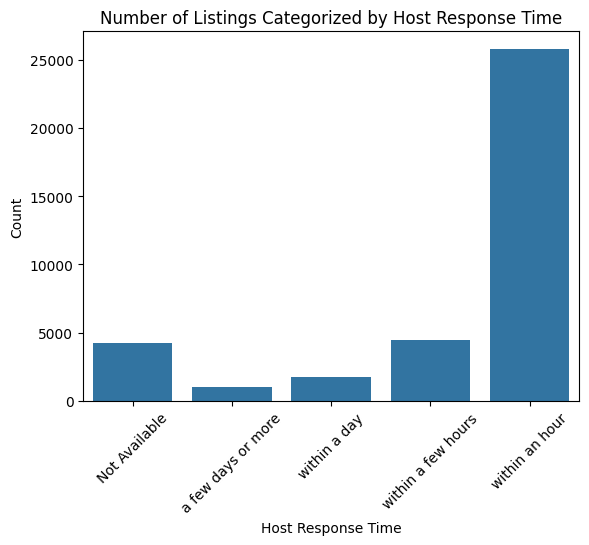

In [548]:
# Barplot of average response rate by host response time
sns.barplot(
    data=response_time_rate_analysis,
    x="host_response_time",
    y="count",
    order=response_time_rate_analysis["host_response_time"],
)
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Host Response Time")
plt.title("Number of Listings Categorized by Host Response Time")
plt.show()

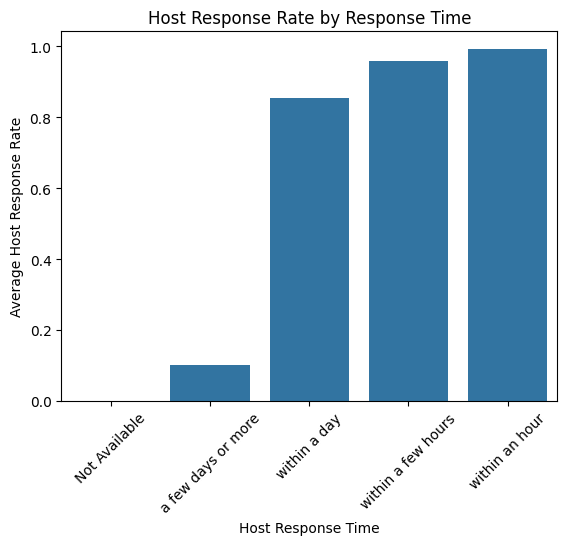

In [549]:
# Barplot of average response rate by host response time
sns.barplot(
    data=response_time_rate_analysis,
    x="host_response_time",
    y="average_response_rate",
    order=response_time_rate_analysis["host_response_time"],
)
plt.xticks(rotation=45)
plt.ylabel("Average Host Response Rate")
plt.xlabel("Host Response Time")
plt.title("Host Response Rate by Response Time")
plt.show()

In [550]:
# Group by host_response_time and calculate the mean and count of host_response_rate
response_time_price_analysis = (
    airbnb.groupby("host_response_time")["price"].agg(["mean", "median"]).reset_index()
)

# Rename columns
response_time_price_analysis.columns = [
    "host_response_time",
    "average_price",
    "median_price",
]

response_time_price_analysis

,host_response_time,average_price,median_price
0,Not Available,379.867447,165.0
1,a few days or more,337.509305,135.0
2,within a day,284.407599,143.0
3,within a few hours,304.120632,131.0
4,within an hour,270.245276,160.0


Insights:

- As response time improves, the average price tends to decrease, with listings that respond within an hour having the lowest average price ($270.25).
- The median price is generally lower than the average price across all categories but the higher-priced listings skew the average price.


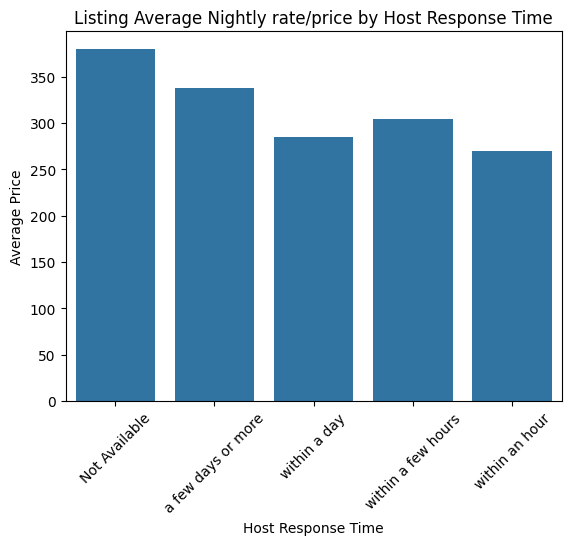

In [551]:
# Barplot of average response rate by host response time
sns.barplot(
    data=response_time_price_analysis,
    x="host_response_time",
    y="average_price",
    order=response_time_price_analysis["host_response_time"],
)
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.xlabel("Host Response Time")
plt.title("Listing Average Nightly rate/price by Host Response Time")
plt.show()

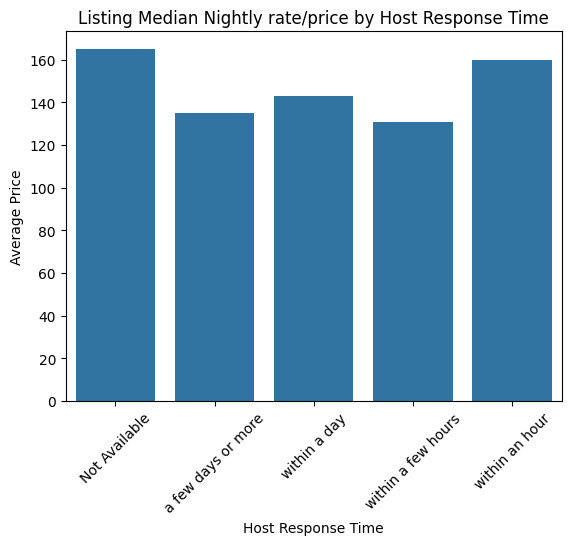

In [552]:
# Barplot of average response rate by host response time
sns.barplot(
    data=response_time_price_analysis,
    x="host_response_time",
    y="median_price",
    order=response_time_price_analysis["host_response_time"],
)
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.xlabel("Host Response Time")
plt.title("Listing Median Nightly rate/price by Host Response Time")
plt.show()

In [553]:
# Group by host_response_time and calculate the mean and count of host_response_rate
response_time_review_analysis = (
    airbnb[airbnb["has_reviews?"]]
    .groupby("host_response_time")["review_scores_rating"]
    .agg(["mean", "median"])
    .reset_index()
)

# Rename columns
response_time_review_analysis.columns = [
    "host_response_time",
    "average_review_scores_rating",
    "median_review_scores_rating",
]

response_time_review_analysis

,host_response_time,average_review_scores_rating,median_review_scores_rating
0,Not Available,4.789160,4.91
1,a few days or more,4.619367,4.83
2,within a day,4.771310,4.92
3,within a few hours,4.797835,4.93
4,within an hour,4.784577,4.90


Insights:

- The review scores are generally very high across all categories, indicating that guests are typically satisfied with their stays regardless of the host's response time.
- Listings with faster response times (within an hour or a few hours) tend to have slightly higher review scores, with the highest median review score seen in the "within a few hours" category.
- Listings with slower response times (especially "Not Available" and "A few days or more") tend to have slightly lower review scores on average, but the scores are still high, reflecting that response time does not heavily impact overall guest satisfaction.


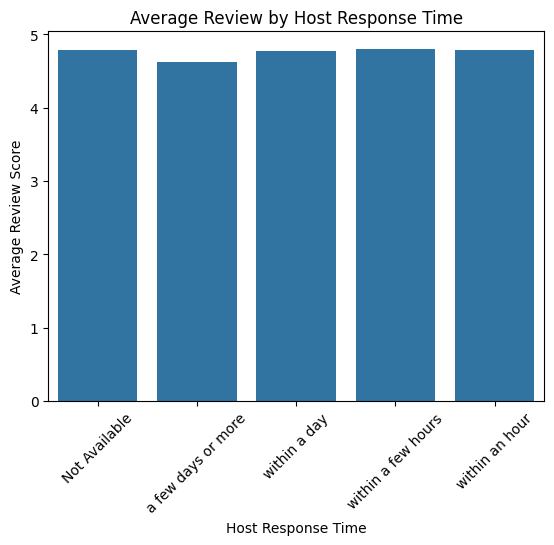

In [554]:
# Barplot of average response rate by host response time
sns.barplot(
    data=response_time_review_analysis,
    x="host_response_time",
    y="average_review_scores_rating",
    order=response_time_review_analysis["host_response_time"],
)
plt.xticks(rotation=45)
plt.ylabel("Average Review Score")
plt.xlabel("Host Response Time")
plt.title("Average Review by Host Response Time")
plt.show()

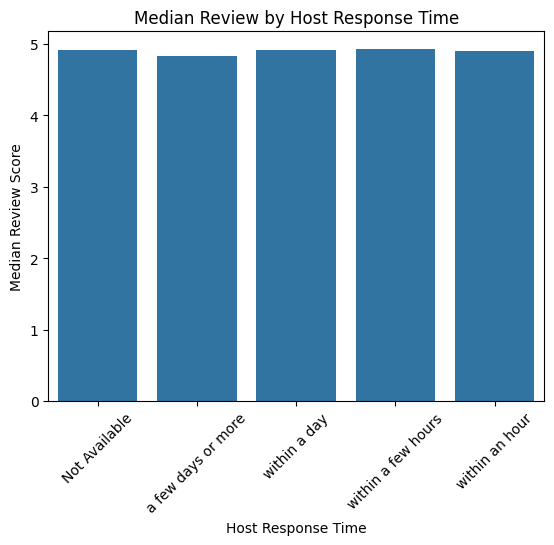

In [555]:
# Barplot of average response rate by host response time
sns.barplot(
    data=response_time_review_analysis,
    x="host_response_time",
    y="median_review_scores_rating",
    order=response_time_review_analysis["host_response_time"],
)
plt.xticks(rotation=45)
plt.ylabel("Median Review Score")
plt.xlabel("Host Response Time")
plt.title("Median Review by Host Response Time")
plt.show()

### Analyzing host response rate


In [556]:
# Calculate the average response rate
average_response_rate = airbnb["host_response_rate"].mean()
print(f"Average Response Rate: {average_response_rate*100:.2f}%")

Average Response Rate: 84.39%


In [557]:
# Group by Superhost status and calculate the mean response rate
superhost_response_rate = (
    airbnb.groupby("host_is_superhost")["host_response_rate"].mean().reset_index()
)

# Rename columns
superhost_response_rate.columns = ["Superhost Status", "Average Response Rate"]
superhost_response_rate

,Superhost Status,Average Response Rate
0,False,0.749033
1,True,0.973854


Insight:

- There is a clear distinction between superhosts and non-superhosts in terms of response rate. Superhosts have a significantly higher average response rate, suggesting that they are more attentive and responsive to guest inquiries, which aligns with the expectations of higher-quality service often associated with superhosts on platforms like Airbnb.


#### What is the distribution of host response rates across listings?


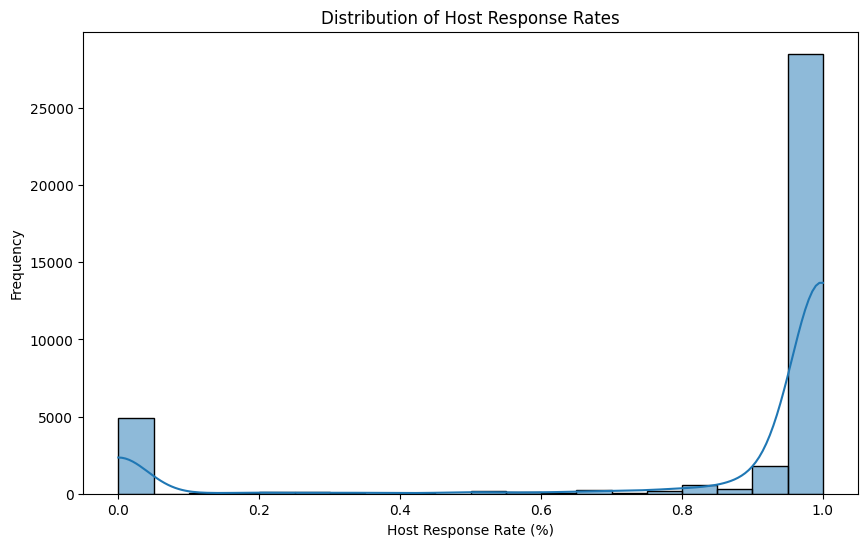

In [558]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(airbnb["host_response_rate"], bins=20, kde=True)
plt.xlabel("Host Response Rate (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Host Response Rates")
plt.show()

#### How does host response rate vary across different neighbourhood groups?


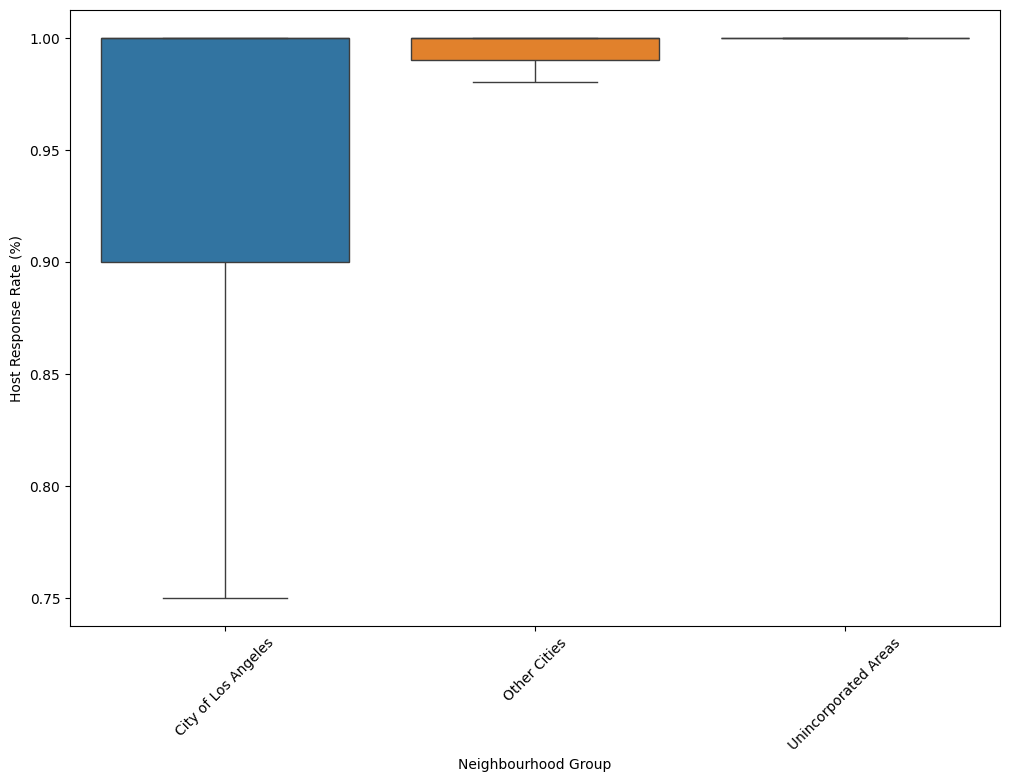

In [559]:
# Create boxplots of host response rate by neighbourhood group
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=airbnb,
    x="neighbourhood_group_cleansed",
    y="host_response_rate",
    hue="neighbourhood_group_cleansed",
    showfliers=False,  # Optional: Remove outliers for a cleaner plot
)
plt.xticks(rotation=45)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Host Response Rate (%)")
plt.show()

#### What is the proportion of superhosts in the dataset?


In [560]:
# Calculate the proportion of superhosts
superhost_count = airbnb["host_is_superhost"].value_counts()
total_count = airbnb.shape[0]

# Proportion of superhosts
proportion_superhosts = superhost_count[True] / total_count
print(f"Proportion of Superhosts: {proportion_superhosts*100:.2f}%")

Proportion of Superhosts: 42.18%


#### How do superhosts compare to non-superhosts in terms of price, review scores, and number of reviews?


In [561]:
# Group by Superhost status and calculate average price, review scores, and number of reviews
superhost_comparison_metrics = (
    airbnb[airbnb["has_reviews?"]]
    .groupby("host_is_superhost")[
        ["price", "review_scores_rating", "number_of_reviews"]
    ]
    .mean()
    .reset_index()
)

superhost_comparison_metrics

,host_is_superhost,price,review_scores_rating,number_of_reviews
0,False,251.699819,4.693176,34.623959
1,True,238.497800,4.870224,73.307048


Insights:

- Superhosts have a higher review score and more reviews than non-superhosts, suggesting that they generally offer a better guest experience and attract more bookings which leads to more reviews, and so on...
- Interestingly, Superhost listings are slightly cheaper on average compared to non-superhost listings. This might be due to superhosts using competitive pricing to attract guests, or they may offer different types of accommodations that cater to a wider range of price points.


#### Host tenure


In [562]:
# Convert 'days_hosting' to years
airbnb["days_hosting_years"] = airbnb["days_hosting"] / 365

# Define tenure bins and labels
bins = [0, 1, 3, float("inf")]
labels = ["<1 year", "1-3 years", "3+ years"]

# Bin 'days_hosting' into tenure categories
airbnb["hosting_tenure"] = pd.cut(
    airbnb["days_hosting_years"], bins=bins, labels=labels, include_lowest=True
)

# View new column
airbnb[["days_hosting", "hosting_tenure"]].head()

,days_hosting,hosting_tenure
0,4339,3+ years
2,579,1-3 years
3,1111,3+ years
4,497,1-3 years
5,320,<1 year


#### How do price and review scores vary by host tenure?


In [563]:
# Group by 'hosting_tenure' and calculate mean price and review scores
tenure_metrics_analysis = (
    airbnb[airbnb["has_reviews?"]]
    .groupby("hosting_tenure")[["price", "review_scores_rating"]]
    .mean()
    .reset_index()
)

tenure_metrics_analysis

,hosting_tenure,price,review_scores_rating
0,<1 year,211.611842,4.603816
1,1-3 years,224.996481,4.721578
2,3+ years,249.412522,4.799925


Insights:

- Pricing increases with tenure, with experienced hosts (3+ years) commanding the highest prices. This suggests that as hosts gain experience and a solid reputation, they can price their listings higher.
- Review scores improve with tenure, with newer hosts receiving slightly lower ratings, but still maintaining relatively high scores. More experienced hosts tend to offer better guest experiences, leading to higher ratings.
- Hosts with 3+ years of experience appear to be more successful in both higher prices and providing higher-quality stays, likely due to improved hosting practices and a stronger reputation built over time.


#### What is the distribution of host tenure in years?


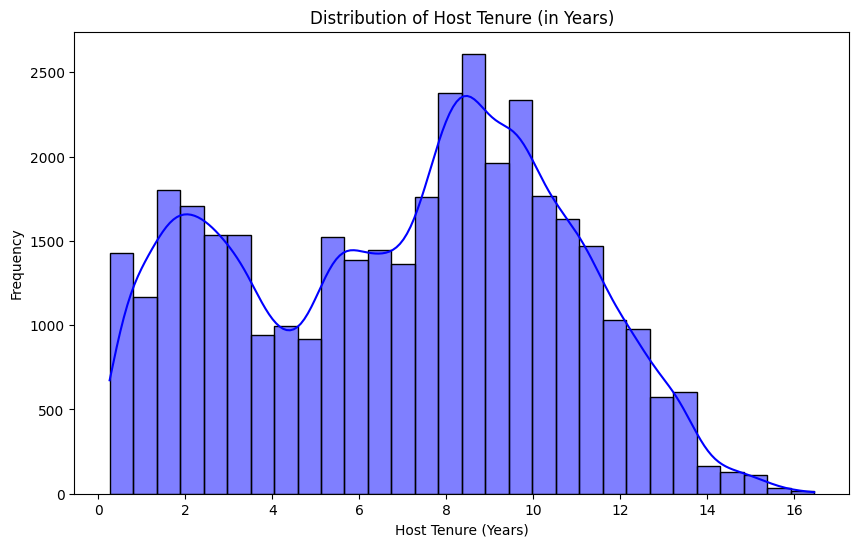

In [564]:
# Plot histogram for 'days_hosting_years' distribution
plt.figure(figsize=(10, 6))
sns.histplot(airbnb["days_hosting_years"], bins=30, kde=True, color="blue")
plt.xlabel("Host Tenure (Years)")
plt.ylabel("Frequency")
plt.title("Distribution of Host Tenure (in Years)")
plt.show()

## Market Analysis


In [565]:
# Summary statistics for price
price_summary = airbnb["price"].describe()
print(f"Price Summary Statistics:\n{price_summary}")

Price Summary Statistics:
count    37296.000000
mean       289.377762
std        715.366985
min          5.000000
25%         98.000000
50%        155.000000
75%        260.000000
max      56425.000000
Name: price, dtype: float64


In [566]:
# Median price
median_price = airbnb["price"].median()
print(f"Median Price: {median_price}")

Median Price: 155.0


Insights:

- The presence of extreme values like the $56,425 listing suggests there are ultra-luxury properties in the Los Angeles airbnb market.
- While the median price is $155, which is a reasonable mid-point, there is a significant portion of listings priced lower indicating that many listings are on the more affordable end.
- The minimum price of $5 and the maximum price of $56,425 point to the existence of extreme outliers in prices.


#### What is the average price in each neighbourhood?


In [567]:
# Group by neighbourhood_cleansed and calculate average price
avg_price_neighbourhood = (
    airbnb.groupby("neighbourhood_cleansed")["price"].mean().reset_index()
)
avg_price_neighbourhood = avg_price_neighbourhood.sort_values(
    by="price", ascending=False
)

avg_price_neighbourhood

,neighbourhood_cleansed,price
19,Bel-Air,2680.753425
136,Malibu,1652.170316
23,Beverly Crest,1521.540107
104,Hollywood Hills West,1144.069149
177,Rancho Palos Verdes,899.468750
...,...,...
109,Irwindale,73.800000
213,Sun Village,58.000000
37,Central-Alameda,54.430556
204,South Park,50.588235


#### What is the average price for each room type?


In [568]:
# Group by room_type and calculate average price
avg_price_room_type = airbnb.groupby("room_type")["price"].mean().reset_index()
avg_price_room_type = avg_price_room_type.sort_values(by="price", ascending=False)

avg_price_room_type

,room_type,price
1,Hotel room,891.465517
0,Entire home/apt,337.884921
2,Private room,118.853773
3,Shared room,48.798419


Insights:

- Hotel rooms are the most expensive type of accommodation, likely reflecting their premium service, location, and amenities. Entire homes/apartments are the next most expensive, offering more privacy and space for guests.
- Private rooms are more budget-friendly, offering personal space at a lower cost.
- Shared rooms are the least expensive, as they typically involve sharing with others, making them the most economical choice.


#### What is the average price for each property type?


In [569]:
# Group by property_type and calculate average price
avg_price_property_type = airbnb.groupby("property_type")["price"].mean().reset_index()
avg_price_property_type = avg_price_property_type.sort_values(
    by="price", ascending=False
)

avg_price_property_type.head(10)

,property_type,price
72,Room in serviced apartment,4188.888889
18,Entire home/apt,3027.200000
26,Entire villa,1834.321429
1,Boat,1460.250000
69,Room in boutique hotel,925.909774
56,Private room in resort,814.333333
6,Castle,809.687500
9,Dome,706.600000
5,Casa particular,591.545455
71,Room in hotel,479.155000


In [570]:
avg_price_property_type.tail(10)

,property_type,price
86,Shared room in villa,58.333333
70,Room in hostel,55.000000
84,Shared room in rental unit,45.938650
78,Shared room in cottage,45.000000
82,Shared room in hostel,42.319149
81,Shared room in home,42.306452
59,Private room in tent,40.000000
50,Private room in houseboat,36.000000
52,Private room in minsu,35.000000
85,Shared room in serviced apartment,32.800000


Insights:

- Room in serviced apartment and entire home/apartment are among the most expensive property types.
- Unusual properties like boats, castles, and dome accommodations are priced higher due to their unique and niche appeal.


## Demand Analysis


#### Which neighbourhoods have the highest total number of reviews?


In [571]:
# Group by 'neighbourhood_cleansed' and sum 'number_of_reviews'
most_reviewed_neighbourhoods = (
    airbnb.groupby("neighbourhood_cleansed")["number_of_reviews"].sum().reset_index()
)

# Sort by 'number_of_reviews' to find the most reviewed neighborhoods
most_reviewed_neighbourhoods = most_reviewed_neighbourhoods.sort_values(
    by="number_of_reviews", ascending=False
)

most_reviewed_neighbourhoods.head()

,neighbourhood_cleansed,number_of_reviews
132,Long Beach,96531
233,Venice,82125
194,Santa Monica,59259
167,Pasadena,37408
219,Topanga,35870


#### What is the average minimum number of nights for each room type?


In [572]:
# Group by room_type and calculate average minimum_nights
avg_min_nights_room_type = (
    airbnb.groupby("room_type")["minimum_nights"].mean().reset_index()
)

avg_min_nights_room_type.head()

,room_type,minimum_nights
0,Entire home/apt,16.233422
1,Hotel room,1.801724
2,Private room,15.444515
3,Shared room,25.128458


Insights:

- Entire homes or apartments and private rooms tend to have longer minimum stay requirements, which is typical for accommodations that offer more privacy and space, possibly suited for guests on extended stays.
- Hotel rooms are the most flexible with a much lower minimum stay requirement, aligning with typical hotel bookings for short stays.
- Shared rooms have the highest minimum stay, which might be related to specific booking patterns or the type of travelers (e.g., long-term budget-conscious guests) who opt for shared accommodations.


#### What is the average minimum number of nights in each neighbourhood?


In [573]:
# Group by neighbourhood_cleansed and calculate average minimum_nights
avg_min_nights_neighbourhood = (
    airbnb.groupby("neighbourhood_cleansed")["minimum_nights"].mean().reset_index()
)

avg_min_nights_neighbourhood.sort_values(by="minimum_nights", ascending=False).head()

,neighbourhood_cleansed,minimum_nights
193,Santa Fe Springs,54.214286
44,Cheviot Hills,45.578947
114,La Habra Heights,42.416667
107,Industry,39.625000
174,Porter Ranch,35.043478


Insights:

- Longer Minimum Stays: These neighborhoods (Santa Fe Springs, Cheviot Hills, La Habra Heights, Industry, and Porter Ranch) have higher average minimum stays compared to many other areas, which may indicate a market for longer-term rentals or vacation homes.
- High Demand for Extended Stays: The trend of higher minimum stays could suggest that these areas may cater to guests looking for accommodations for extended periods, such as business professionals, contractors, or long-term travelers.
- These areas could be more suited for vacation rentals or subletting, as the average stay requirements seem longer than typical short-term stays.


#### How many listings are there for each property type?


In [574]:
# Count the frequency of each property_type
property_type_counts = airbnb["property_type"].value_counts().reset_index()
property_type_counts.columns = ["Property Type", "Count"]

property_type_counts

,Property Type,Count
0,Entire home,10995
1,Entire rental unit,9539
2,Private room in home,4598
3,Entire guesthouse,2483
4,Entire condo,1449
...,...,...
91,Shared room in cottage,1
92,Private room in nature lodge,1
93,Private room in dome,1
94,Minsu,1


Insights:

- Entire homes and entire rental units are the most common property types, likely because they provide guests with complete privacy and independence.
- Private rooms in homes are a popular choice for budget-conscious travelers who don’t mind sharing common areas with others.
- Entire guesthouses and entire condos are less common but still contribute significantly to the Airbnb market, with guesthouses possibly appealing to those looking for a more private, detached space and condos attracting those in urban settings.


#### How many listings are there for each room type?


In [575]:
# Count the frequency of each room_type
room_type_counts = airbnb["room_type"].value_counts().reset_index()
room_type_counts.columns = ["Room Type", "Count"]

room_type_counts

,Room Type,Count
0,Entire home/apt,28789
1,Private room,7885
2,Shared room,506
3,Hotel room,116


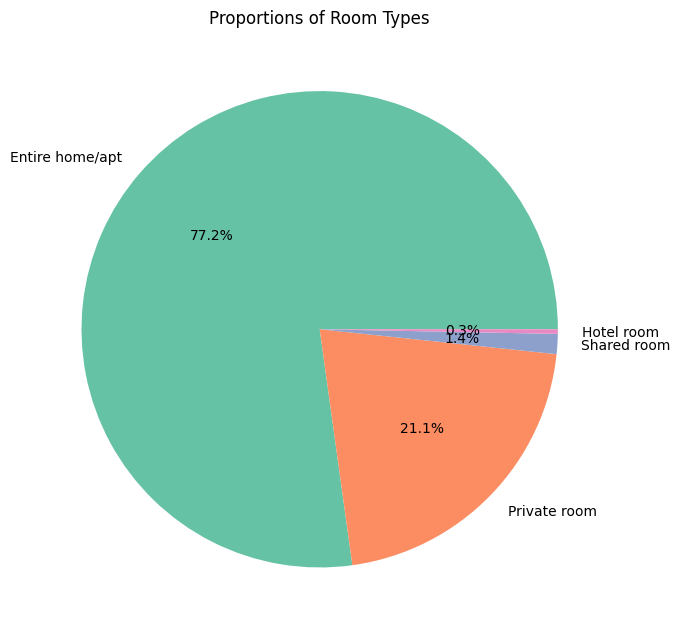

In [576]:
# Pie chart for room_type proportions
plt.figure(figsize=(7, 7))
room_type_counts.set_index("Room Type")["Count"].plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=sns.color_palette("Set2", n_colors=len(room_type_counts)),
    legend=False,
)
plt.title("Proportions of Room Types")
plt.ylabel("")
plt.tight_layout()
plt.show()

Insights:

- The entire home/apt category dominates the listings on Airbnb, indicating a preference for private, self-contained spaces.
- Private rooms are the second most popular option, likely due to their affordability compared to entire homes or apartments.
- Shared rooms and hotel rooms are much less common, with shared rooms being a more budget-friendly option and hotel rooms offering a traditional hotel experience, but they are less popular compared to other Airbnb listings.


#### Which property types accommodate the most guests on average?


In [577]:
# Group by property_type and calculate average accommodates
avg_accommodates_property_type = (
    airbnb.groupby("property_type")["accommodates"].mean().reset_index()
)

avg_accommodates_property_type.sort_values(by="accommodates", ascending=False).head(10)

,property_type,accommodates
6,Castle,10.687500
18,Entire home/apt,9.500000
26,Entire villa,9.366460
31,Minsu,8.000000
9,Dome,7.600000
4,Campsite,7.166667
17,Entire home,6.562801
24,Entire townhouse,6.542400
27,Farm stay,6.434783
8,Cycladic home,6.000000


Insights:

- Large properties like castles, entire homes/apt, and villas can accommodate the most guests, typically designed for family vacations or large groups.
- More unique or niche properties like domes, campsites, and Minsu also provide relatively spacious accommodations but may be more specialized for certain types of travelers.
- Smaller homes like farm stays and Cycladic homes typically cater to medium-sized groups or families looking for specific experiences.


#### Which neighbourhoods have the highest number of listings?


In [578]:
# Group by neighbourhood_cleansed and count the number of listings
listing_density_neighbourhood = (
    airbnb.groupby("neighbourhood_cleansed")["id"].count().reset_index()
)
listing_density_neighbourhood.columns = ["Neighbourhood", "Listing Count"]

# Sort by the number of listings to find the highest-density neighborhoods
listing_density_neighbourhood = listing_density_neighbourhood.sort_values(
    by="Listing Count", ascending=False
)

listing_density_neighbourhood.head()

,Neighbourhood,Listing Count
132,Long Beach,1596
233,Venice,1318
102,Hollywood,1308
25,Beverly Hills,1304
194,Santa Monica,1302


Insights:

- Long Beach stands out with the highest number of listings, reflecting its broad appeal across different types of travelers.
- Venice and Santa Monica, both coastal and tourist-heavy areas, also show strong listing counts, indicating a consistent demand for accommodations in these neighborhoods.
- Hollywood and Beverly Hills, iconic areas for entertainment and luxury, maintain strong listing counts as well, catering to both luxury tourists and Hollywood fans.


#### How are the listings distributed across different price ranges?


In [579]:
# Define updated price bins and labels
bins = [0, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, float("inf")]
labels = [
    "0-50",
    "51-100",
    "101-200",
    "201-300",
    "301-400",
    "401-500",
    "501-1000",
    "1001-2000",
    "2001-3000",
    "3000+",
]

# Create a new column for price bins
airbnb["price_range"] = pd.cut(airbnb["price"], bins=bins, labels=labels, right=False)

airbnb["price_range"].value_counts()

price_range
101-200      13783
51-100        7678
201-300       6089
301-400       2696
501-1000      2202
0-50          2070
401-500       1302
1001-2000      938
3000+          288
2001-3000      250
Name: count, dtype: int64

Insights:

- The $101-$200 price range is by far the most common, followed by the $51-$100 range, indicating that many travelers seek affordable to moderately priced accommodations.
- Higher price ranges like $501-$1000, $1001-2000, and $3000+ have significantly fewer listings, pointing to a more selective, luxury market.
  Budget accommodations (such as those in the $0-$50 range) are also available but represent a smaller portion of the overall listings.


#### What is the average rating and total number of reviews across different price ranges?


In [580]:
# Group by price_range and calculate the required aggregation
price_review_analysis = (
    airbnb[airbnb["has_reviews?"]]
    .groupby("price_range")
    .agg(
        avg_rating=("review_scores_rating", "mean"),
        total_reviews=("number_of_reviews", "sum"),
    )
    .reset_index()
)

# Display the results
price_review_analysis

,price_range,avg_rating,total_reviews
0,0-50,4.649601,41895
1,51-100,4.758606,340115
2,101-200,4.778980,704984
3,201-300,4.806128,228821
4,301-400,4.834593,90588
5,401-500,4.835683,49038
6,501-1000,4.846385,57193
7,1001-2000,4.808552,13168
8,2001-3000,4.867876,1057
9,3000+,4.795895,1008


Insights:

- Higher Price Ranges generally correlate with higher average ratings, suggesting that guests are more satisfied with premium and luxury accommodations.
- The $101-$200 price range has the most total reviews, indicating it's the most popular and balanced in terms of guest satisfaction and affordability.
- Lower Price Ranges like $0-$50 have more reviews in absolute terms, but the average rating tends to be lower, possibly reflecting that budget accommodations may not always meet the high expectations of guests.
- The highest price ranges ($2000+) show the smallest number of reviews, reflecting the exclusive nature of the properties and their selective customer base.


#### Summary of review scores


In [581]:
# Calculate mean, median, and standard deviation of review_scores_rating
mean_review_score = airbnb[airbnb["has_reviews?"]]["review_scores_rating"].mean()
median_review_score = airbnb[airbnb["has_reviews?"]]["review_scores_rating"].median()
std_review_score = airbnb[airbnb["has_reviews?"]]["review_scores_rating"].std()

print(f"Mean Review Score: {mean_review_score:.4f}")
print(f"Median Review Score: {median_review_score:.4f}")
print(f"Standard Deviation of Review Scores: {std_review_score:.4f}")

Mean Review Score: 4.7833
Median Review Score: 4.9000
Standard Deviation of Review Scores: 0.4091


Keep in mind that, the maximum score a guest can get is 5.

The high mean and median scores, coupled with the low standard deviation, reflect a generally high level of guest satisfaction across Airbnb listings. It suggests that the platform's quality control or guest expectations are well-matched, leading to consistent positive experiences for travelers.


#### How many listings have perfect scores and how many have the lowest scores?


In [582]:
# Listings with perfect scores
perfect_scores = airbnb[
    (airbnb["has_reviews?"]) & (airbnb["review_scores_rating"] == 1)
]

# Listings with the lowest scores
lowest_scores = airbnb[(airbnb["has_reviews?"]) & (airbnb["review_scores_rating"] < 2)]

# Display the results
print(f"Listings with perfect scores: {len(perfect_scores)}")
print(f"Listings with lowest scores: {len(lowest_scores)}")

Listings with perfect scores: 114
Listings with lowest scores: 116


Excluded the listings with the zeros because, all of those listings had no reviews yet and a guest cannot rate a guest a 0 out of 5. Making it impossible to get a 0 listing rating.


#### What is the distribution of review scores across listings?


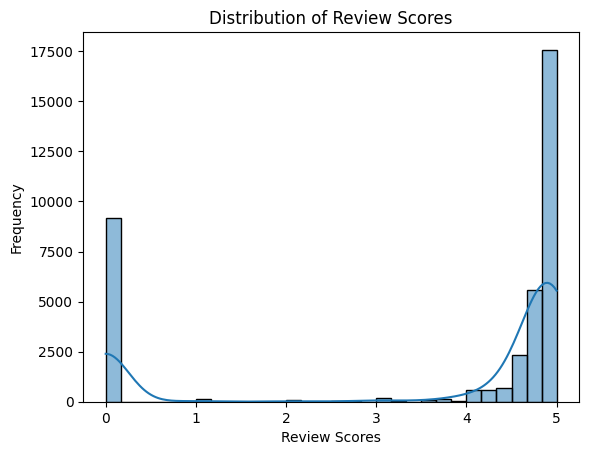

In [583]:
# Plot histogram of review_scores_rating
sns.histplot(airbnb["review_scores_rating"], kde=True, bins=30)
plt.title("Distribution of Review Scores")
plt.xlabel("Review Scores")
plt.ylabel("Frequency")
plt.show()

#### How do review scores and number of reviews vary by room type?


In [584]:
# Group by room_type and calculate average review_scores_rating and total number_of_reviews
room_type_review_analysis = (
    airbnb[airbnb["has_reviews?"]]
    .groupby("room_type")[["review_scores_rating", "number_of_reviews"]]
    .agg({"review_scores_rating": "mean", "number_of_reviews": "sum"})
    .reset_index()
)

# Display the results
room_type_review_analysis

,room_type,review_scores_rating,number_of_reviews
0,Entire home/apt,4.792809,1207987
1,Hotel room,4.681633,1410
2,Private room,4.758448,312665
3,Shared room,4.529605,5805


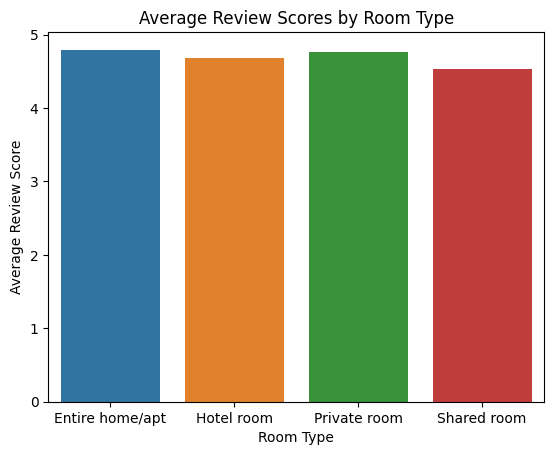

In [585]:
# Plot bar chart
sns.barplot(
    data=room_type_review_analysis,
    x="room_type",
    y="review_scores_rating",
    hue="room_type",
)
plt.title("Average Review Scores by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Review Score")
plt.show()

Insights:

- Entire homes/apartments dominate in both popularity and guest satisfaction, making them the top choice for travelers.
- Private rooms are a strong secondary option, appealing to budget-conscious guests who still value privacy.
- Hotel rooms and shared rooms cater to niche markets, but their lower review scores and total reviews indicate they may not be the primary preference for most travelers.


#### How do average review scores vary across neighbourhood groups?


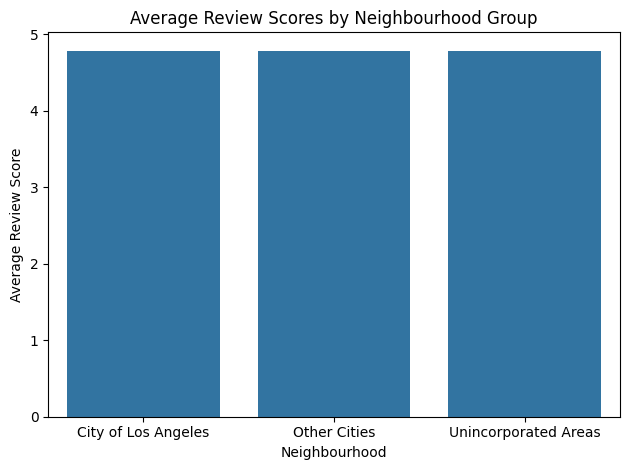

In [586]:
# Calculate average review_scores_rating by neighbourhood_cleansed
neighbourhood_grp_review_scores = (
    airbnb[airbnb["has_reviews?"]]
    .groupby("neighbourhood_group_cleansed")["review_scores_rating"]
    .mean()
    .reset_index()
)

# Plot bar chart
sns.barplot(
    data=neighbourhood_grp_review_scores,
    x="neighbourhood_group_cleansed",
    y="review_scores_rating",
)
plt.title("Average Review Scores by Neighbourhood Group")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Review Score")
plt.tight_layout()
plt.show()

## Successful Business Insights


#### What is the most highly rated and the most frequently booked room type?


In [587]:
# Sort by highest average review scores
highest_rated_room_type = room_type_review_analysis.sort_values(
    by="review_scores_rating", ascending=False
).iloc[0]
print("Most Highly Rated Room Type:")
print("---------------------------------------")
print(highest_rated_room_type, "\n")

# Sort by highest number of reviews (most frequently booked)
most_frequent_room_type = room_type_review_analysis.sort_values(
    by="number_of_reviews", ascending=False
).iloc[0]
print("Most Frequently Booked Room Type:")
print("---------------------------------------")
print(most_frequent_room_type)

Most Highly Rated Room Type:
---------------------------------------
room_type               Entire home/apt
review_scores_rating           4.792809
number_of_reviews               1207987
Name: 0, dtype: object 

Most Frequently Booked Room Type:
---------------------------------------
room_type               Entire home/apt
review_scores_rating           4.792809
number_of_reviews               1207987
Name: 0, dtype: object


#### What is the analysis of the average number of reviews and review scores by price range?


In [588]:
# Group by price_bin and calculate the average number_of_reviews and review_scores_rating
price_range_analysis = (
    airbnb[airbnb["has_reviews?"]]
    .groupby("price_range")[["number_of_reviews", "review_scores_rating"]]
    .agg({"number_of_reviews": "mean", "review_scores_rating": "mean"})
    .reset_index()
)

# Display the results
price_range_analysis

,price_range,number_of_reviews,review_scores_rating
0,0-50,30.941654,4.649601
1,51-100,55.240377,4.758606
2,101-200,65.161660,4.778980
3,201-300,50.367819,4.806128
4,301-400,45.271364,4.834593
5,401-500,50.398767,4.835683
6,501-1000,36.851160,4.846385
7,1001-2000,25.081905,4.808552
8,2001-3000,9.353982,4.867876
9,3000+,10.610526,4.795895


Insights:

- Guest satisfaction generally improves as price increases, with higher-tier listings receiving better review scores. This suggests that higher-priced accommodations provide a superior experience.
- Review volume peaks in the $101-$200 price range, indicating its broad appeal to guests seeking a balance of affordability and quality.
- Luxury price ranges ($2001+) have fewer reviews but very high ratings, reflecting their exclusivity and specialized appeal.


#### What are the price ranges with the highest demand and the best ratings?


In [589]:
# Identify price range with highest demand (most reviews)
highest_demand_range = price_range_analysis.sort_values(
    by="number_of_reviews", ascending=False
).iloc[0]

# Identify price range with best ratings
best_rated_range = price_range_analysis.sort_values(
    by="review_scores_rating", ascending=False
).iloc[0]

print(
    f"Highest demand price range: {highest_demand_range['price_range']} with {highest_demand_range['number_of_reviews']:.2f} reviews on average"
)
print(
    f"Best rated price range: {best_rated_range['price_range']} with {best_rated_range['review_scores_rating']:.2f} rating on average"
)

Highest demand price range: 101-200 with 65.16 reviews on average
Best rated price range: 2001-3000 with 4.87 rating on average


The $101-$200 range is ideal for attracting high volumes of guests, making it a strategic choice for maximizing bookings. Meanwhile, the $2001-$3000 range caters to a niche audience seeking premium experiences, resulting in outstanding reviews. These insights are valuable for hosts aiming to position their listings based on guest expectations and market trends.


#### How do listings with high ratings (4.8 or above) compare to others in terms of price, availability, and number of reviews?


In [590]:
# Create the binary variable 'high_rating'
airbnb["high_rating"] = airbnb["review_scores_rating"].apply(
    lambda x: True if x >= 4.8 else False
)

# Group by high_rating and calculate the mean of selected features
high_rating_comparison = (
    airbnb.groupby("high_rating")[["price", "availability_365", "number_of_reviews"]]
    .mean()
    .reset_index()
)

# Display the comparison
high_rating_comparison

,high_rating,price,availability_365,number_of_reviews
0,False,320.210323,249.410278,22.848072
1,True,261.093975,214.265268,57.586161


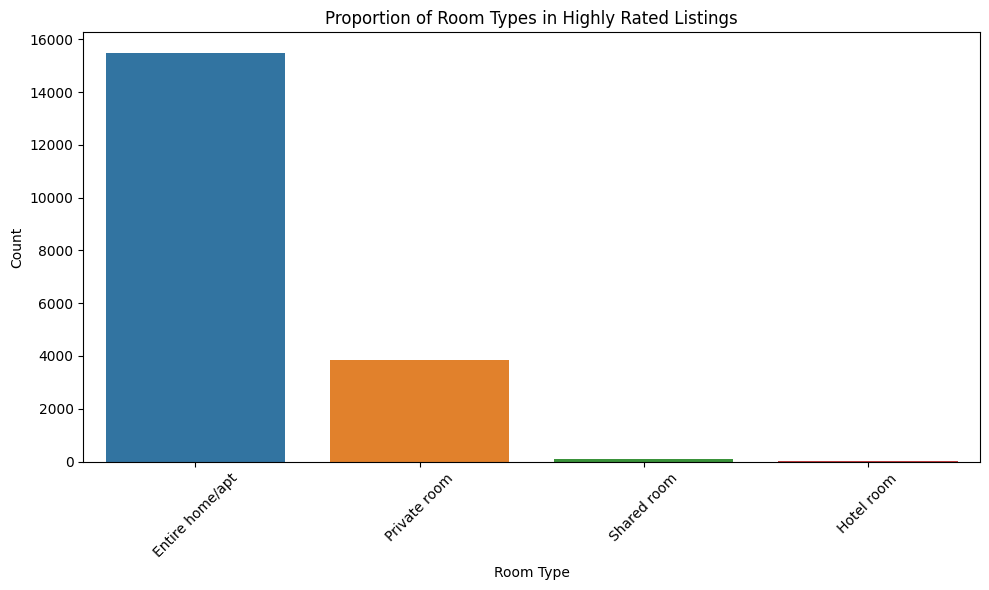

In [591]:
# Filter data for high-rated listings
high_rated_listings = airbnb[airbnb["high_rating"] == True]

# Plot a bar chart to show the distribution of room types in high-rated listings
plt.figure(figsize=(10, 6))
sns.countplot(data=high_rated_listings, x="room_type", hue="room_type")
plt.title("Proportion of Room Types in Highly Rated Listings")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:

- Highly-rated listings tend to be priced more affordably, have slightly lower availability, and receive significantly more reviews.
- Hosts aiming for high ratings should consider balancing pricing and availability to align with guest expectations while fostering engagement.


### Map


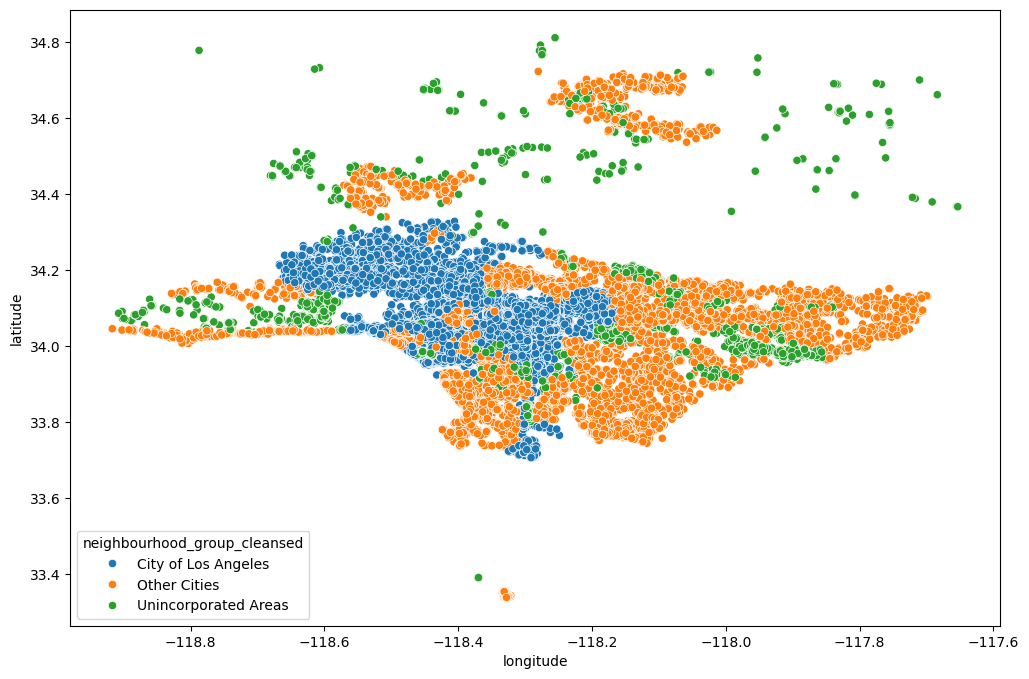

In [592]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=airbnb,
    x="longitude",
    y="latitude",
    hue="neighbourhood_group_cleansed",
    legend=1,
)
plt.show()

# Conclusion


These insights can be generalized to understand what guests and the Airbnb platform prioritizes. We should note that, values are specific to the Los Angeles market.

In this project, we discover that insights reveal that Airbnb guest preferences prioritize affordability and quality, with listings priced between $101-$200 achieving the highest demand, while luxury stays ($2001-$3000) deliver exceptional higher ratings on average (4.87). Entire homes dominate with privacy and high ratings on average (4.79), while unique properties like castles and villas attract niche markets. Guest satisfaction thrives on mid-to-upper-tier pricing ($201-$500) and is bolstered by responsive hosts, especially Superhosts, who achieve higher ratings (4.87) and more reviews. Strategic host practices like quick responses, enhance demand and ratings. Popular neighbours like Santa Monica and Hollywood with relatively higher reviews numbers and scores emphasize the importance of location in driving bookings.

The Airbnb market thrives on guest satisfaction and value-for-money experiences. By aligning offerings with thoughtful pricing, responsive hosting, and strategic property positioning (location) hosts can optimize their performance, attract more bookings, and foster long-term loyalty.
